In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
turn0 = pd.read_csv('turnstile_191221.txt')
turn1 = pd.read_csv('turnstile_191228.txt')
turn2 = pd.read_csv('turnstile_200104.txt')

In [6]:
df = pd.concat([turn0, turn1, turn2])

In [10]:
df.reset_index(inplace=True)

In [8]:
df.reset_index()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/14/2019,03:00:00,REGULAR,7309003,2477349
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/14/2019,07:00:00,REGULAR,7309008,2477362
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/14/2019,11:00:00,REGULAR,7309080,2477433
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/14/2019,15:00:00,REGULAR,7309289,2477498
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/14/2019,19:00:00,REGULAR,7309595,2477541
...,...,...,...,...,...,...,...,...,...,...,...,...
620806,206494,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/03/2020,04:00:00,REGULAR,5554,420
620807,206495,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/03/2020,08:00:00,REGULAR,5554,420
620808,206496,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/03/2020,12:00:00,REGULAR,5554,420
620809,206497,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/03/2020,16:00:00,REGULAR,5554,420


In [11]:
df

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/14/2019,03:00:00,REGULAR,7309003,2477349
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/14/2019,07:00:00,REGULAR,7309008,2477362
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/14/2019,11:00:00,REGULAR,7309080,2477433
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/14/2019,15:00:00,REGULAR,7309289,2477498
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/14/2019,19:00:00,REGULAR,7309595,2477541
...,...,...,...,...,...,...,...,...,...,...,...,...
620806,206494,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/03/2020,04:00:00,REGULAR,5554,420
620807,206495,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/03/2020,08:00:00,REGULAR,5554,420
620808,206496,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/03/2020,12:00:00,REGULAR,5554,420
620809,206497,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/03/2020,16:00:00,REGULAR,5554,420


## Challenge 2

In [13]:
df['DATETIME'] = pd.to_datetime(pd.Series([df.DATE[i]+'T'+df.TIME[i] for i in range(len(df.DATE))]))

In [15]:
df.DATETIME.dtype

dtype('<M8[ns]')

## Challenge 3

In [17]:
gb0 = df.groupby(['C/A','UNIT','SCP','STATION','DATE'])

## Challenge 4

In [30]:
df = df.rename(columns={'C/A':'CA'})
ts0 = df.query("CA=='PTH18'").query("UNIT=='R549'").query("SCP=='01-00-00'")

In [46]:
ts0.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)


In [41]:
ts0['INS'] = ts0['ENTRIES'] - ts0['ENTRIES'].shift(1)

In [47]:
ts0['OUTS'] = ts0['EXITS'] - ts0['EXITS'].shift(1)

In [48]:
ts0

,level_0,index,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,INS,OUTS
0,125510,125510,PTH18,R549,01-00-00,NEWARK BM BW,1,PTH,12/14/2019,04:01:04,REGULAR,17240,17303,2019-12-14 04:01:04,NaN,NaN
1,125511,125511,PTH18,R549,01-00-00,NEWARK BM BW,1,PTH,12/14/2019,08:13:04,REGULAR,17263,17394,2019-12-14 08:13:04,23.0,91.0
2,125512,125512,PTH18,R549,01-00-00,NEWARK BM BW,1,PTH,12/14/2019,12:25:04,REGULAR,17341,17403,2019-12-14 12:25:04,78.0,9.0
3,125513,125513,PTH18,R549,01-00-00,NEWARK BM BW,1,PTH,12/14/2019,16:37:04,REGULAR,17409,17423,2019-12-14 16:37:04,68.0,20.0
4,125514,125514,PTH18,R549,01-00-00,NEWARK BM BW,1,PTH,12/14/2019,20:49:04,REGULAR,17464,17438,2019-12-14 20:49:04,55.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,538597,124285,PTH18,R549,01-00-00,NEWARK BM BW,1,PTH,01/03/2020,06:25:08,REGULAR,23845,22431,2020-01-03 06:25:08,41.0,25.0
114,538598,124286,PTH18,R549,01-00-00,NEWARK BM BW,1,PTH,01/03/2020,10:37:08,REGULAR,23957,22444,2020-01-03 10:37:08,112.0,13.0
115,538599,124287,PTH18,R549,01-00-00,NEWARK BM BW,1,PTH,01/03/2020,14:49:08,REGULAR,24028,22464,2020-01-03 14:49:08,71.0,20.0
116,538600,124288,PTH18,R549,01-00-00,NEWARK BM BW,1,PTH,01/03/2020,19:01:08,REGULAR,24122,22475,2020-01-03 19:01:08,94.0,11.0


In [49]:
ts0a = ts0.dropna()

In [52]:
ts0a = ts0a.groupby('DATE').agg({'INS':'sum', 'OUTS':'sum'})

In [53]:
ts0a

,INS,OUTS
DATE,,
01/01/2020,217.0,58.0
01/02/2020,435.0,218.0
01/03/2020,355.0,134.0
12/14/2019,224.0,135.0
12/15/2019,223.0,97.0
12/16/2019,455.0,134.0
12/17/2019,337.0,226.0
12/18/2019,446.0,155.0
12/19/2019,395.0,160.0


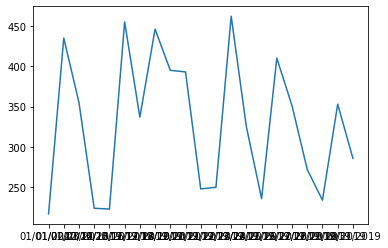

In [54]:
plt.plot(ts0a.index, ts0a['INS'])

## Challenge 5

In [59]:
df['INS'] = 0
df['OUTS']=0

In [64]:
def get_ins_outs(df):
    for i, row in df.iterrows():
        if i == 0: continue
        if df['CA'][i] == df['CA'][i-1] and df['UNIT'][i] == df['UNIT'][i-1] and df['SCP'][i] == df['SCP'][i-1]:
            df['INS'][i] = row.ENTRIES - df.loc[i-1].ENTRIES
            df['OUTS'][i] = row.EXITS - df.loc[i-1].EXITS

In [65]:
get_ins_outs(df)

<ipython-input-64-4c064ef98131>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INS'][i] = row.ENTRIES - df.loc[i-1].ENTRIES
<ipython-input-64-4c064ef98131>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OUTS'][i] = row.EXITS - df.loc[i-1].EXITS


In [66]:
df

,index,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,INS,OUTS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/14/2019,03:00:00,REGULAR,7309003,2477349,2019-12-14 03:00:00,0,0
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/14/2019,07:00:00,REGULAR,7309008,2477362,2019-12-14 07:00:00,5,13
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/14/2019,11:00:00,REGULAR,7309080,2477433,2019-12-14 11:00:00,72,71
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/14/2019,15:00:00,REGULAR,7309289,2477498,2019-12-14 15:00:00,209,65
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/14/2019,19:00:00,REGULAR,7309595,2477541,2019-12-14 19:00:00,306,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620806,206494,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/03/2020,04:00:00,REGULAR,5554,420,2020-01-03 04:00:00,0,0
620807,206495,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/03/2020,08:00:00,REGULAR,5554,420,2020-01-03 08:00:00,0,0
620808,206496,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/03/2020,12:00:00,REGULAR,5554,420,2020-01-03 12:00:00,0,0
620809,206497,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/03/2020,16:00:00,REGULAR,5554,420,2020-01-03 16:00:00,0,0


In [71]:
ts1 = df.groupby(['CA', 'UNIT', 'STATION', 'DATE'])

In [72]:
ts1

In [73]:
ts1a = ts1.agg({'INS':'sum','OUTS':'sum'})

In [74]:
ts1a

INS  OUTS
CA    UNIT STATION       DATE                   
A002  R051 59 ST         01/01/2020   5267  3225
                         01/02/2020  12123  7737
                         01/03/2020  12015  7729
                         12/14/2019   7709  4824
                         12/15/2019   7113  3963
...                                    ...   ...
TRAM2 R469 RIT-ROOSEVELT 12/27/2019   3827    95
                         12/28/2019   4041    66
                         12/29/2019   3375    90
                         12/30/2019   2234    64
                         12/31/2019   3402    77

[15657 rows x 2 columns]

## Challenge 6

In [75]:
ts2 = df.groupby(['STATION', 'DATE'])

In [76]:
ts2a = ts2.agg({'INS':'sum','OUTS':'sum'})

In [77]:
ts2a

INS   OUTS
STATION   DATE                    
1 AV      01/01/2020   7253   9266
          01/02/2020  15443  17949
          01/03/2020  16168  18683
          12/14/2019   7772   8754
          12/15/2019   6555   7222
...                     ...    ...
ZEREGA AV 12/27/2019   2155   1998
          12/28/2019   1141   1017
          12/29/2019   1003   1106
          12/30/2019   1865   1941
          12/31/2019   1767   1836

[7935 rows x 2 columns]

## Challenge 7

In [78]:
ts2a.index

MultiIndex([(     '1 AV', '01/01/2020'),
            (     '1 AV', '01/02/2020'),
            (     '1 AV', '01/03/2020'),
            (     '1 AV', '12/14/2019'),
            (     '1 AV', '12/15/2019'),
            (     '1 AV', '12/16/2019'),
            (     '1 AV', '12/17/2019'),
            (     '1 AV', '12/18/2019'),
            (     '1 AV', '12/19/2019'),
            (     '1 AV', '12/20/2019'),
            ...
            ('ZEREGA AV', '12/22/2019'),
            ('ZEREGA AV', '12/23/2019'),
            ('ZEREGA AV', '12/24/2019'),
            ('ZEREGA AV', '12/25/2019'),
            ('ZEREGA AV', '12/26/2019'),
            ('ZEREGA AV', '12/27/2019'),
            ('ZEREGA AV', '12/28/2019'),
            ('ZEREGA AV', '12/29/2019'),
            ('ZEREGA AV', '12/30/2019'),
            ('ZEREGA AV', '12/31/2019')],
           names=['STATION', 'DATE'], length=7935)

In [82]:
newark_daily = ts2a.loc['NEWARK BM BW']

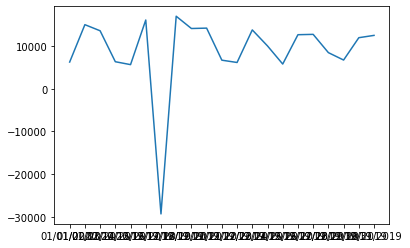

In [83]:
plt.plot(newark_daily.index, newark_daily.INS)

Apparently we had -30000 riders one day.

## Challenge 8

In [87]:
newark_daily

,INS,OUTS
DATE,,
01/01/2020,6234,476
01/02/2020,14990,830
01/03/2020,13560,484
12/14/2019,6310,634
12/15/2019,5629,477
12/16/2019,16079,548
12/17/2019,-29335,-2646
12/18/2019,16962,597
12/19/2019,14090,695


In [94]:
newark_daily['DATE'] = pd.to_datetime(newark_daily.index)

In [95]:
newark_daily['DAY'] = [d.dayofweek for d in newark_daily['DATE']]

,INS,OUTS,DAY,DATE
DATE,,,,
01/01/2020,6234,476,2,2020-01-01
01/02/2020,14990,830,3,2020-01-02
01/03/2020,13560,484,4,2020-01-03
12/14/2019,6310,634,5,2019-12-14
12/15/2019,5629,477,6,2019-12-15
12/16/2019,16079,548,0,2019-12-16
12/17/2019,-29335,-2646,1,2019-12-17
12/18/2019,16962,597,2,2019-12-18
12/19/2019,14090,695,3,2019-12-19


In [97]:
newark_daily.sort_values('DATE')

ValueError: 'DATE' is both an index level and a column label, which is ambiguous.